In [1]:
%pwd

'h:\\ML PROJECT\\image_classification\\notebook'

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
import gdown
import os

In [5]:
os.chdir("../")

In [6]:
%pwd

'h:\\ML PROJECT\\image_classification'

In [7]:
dataset_url = "https://drive.google.com/file/d/1wnRSfZYB7YdWAF8sKQry8bNIVtfm4iDW/view?usp=sharing"
os.makedirs("data", exist_ok=True)
file_id = dataset_url.split("/")[-2]
prefix = 'https://drive.google.com/uc?/export=download&id='
zip_download_dir="data/data.zip"
gdown.download(prefix+file_id,zip_download_dir)

Downloading...
From: https://drive.google.com/uc?/export=download&id=1wnRSfZYB7YdWAF8sKQry8bNIVtfm4iDW
To: h:\ML PROJECT\image_classification\data\data.zip
100%|██████████| 9.10M/9.10M [00:13<00:00, 669kB/s]


'data/data.zip'

In [8]:
import zipfile

In [9]:
unzip_path ="data"
os.makedirs(unzip_path, exist_ok=True)
with zipfile.ZipFile("data/data.zip", 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/catdog/train-20240105T154814Z-001/train'
valid_path = 'data/catdog/validation-20240105T154824Z-001/validation'

In [11]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in vgg16.layers:
  print(layer)

In [13]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [14]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [15]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
  # useful for getting number of output classes
folders = glob('data/catdog/train-20240105T154814Z-001/train\*')

In [17]:
len(folders)

2

In [18]:
folders

['data/catdog/train-20240105T154814Z-001/train\\Cat',
 'data/catdog/train-20240105T154814Z-001/train\\Dog']

In [19]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [20]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 337 images belonging to 2 classes.


In [24]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 59 images belonging to 2 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
11/11 [==============================] - 183s 16s/step - loss: 2.3317 - accuracy: 0.5935 - val_loss: 1.2661 - val_accuracy: 0.6441
Epoch 2/10
11/11 [==============================] - 125s 11s/step - loss: 0.3662 - accuracy: 0.8872 - val_loss: 0.5328 - val_accuracy: 0.8136
Epoch 3/10
11/11 [==============================] - 131s 12s/step - loss: 0.2442 - accuracy: 0.9228 - val_loss: 0.5622 - val_accuracy: 0.8136
Epoch 4/10
11/11 [==============================] - 132s 12s/step - loss: 0.1960 - accuracy: 0.9347 - val_loss: 0.5982 - val_accuracy: 0.8136
Epoch 5/10
11/11 [==============================] - 131s 12s/step - loss: 0.1393 - accuracy: 0.9496 - val_loss: 0.5139 - val_accuracy: 0.8305
Epoch 6/10
11/11 [==============================] - 130s 12s/step - loss: 0.0888 - accuracy: 0.9585 - val_loss: 0.5326 - val_accuracy: 0.8305
Epoch 7/10
11/11 [==============================] - 130s 12s/step - loss: 0.0586 - accuracy: 0.9733 - val_loss: 0.7471 - val_accuracy: 0.7797
Epoch 

In [1]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model/model.h5')

NameError: name 'model' is not defined

In [27]:
y_pred = model.predict(test_set)

2/2 [==============================] - 17s 8s/step


In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_vgg16.h5')

In [32]:
img=image.load_img('cat.jpg',target_size=(224,224))

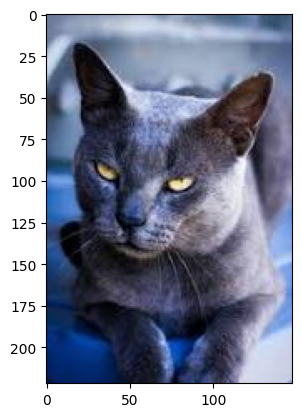

In [35]:
import matplotlib.pyplot as plt
Z = plt.imread('cat.jpg')
plt.imshow(Z)

In [36]:
x=image.img_to_array(img)
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
from keras.applications.vgg16 import preprocess_input

In [39]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [40]:
model.predict(img_data)

1/1 [==============================] - 1s 847ms/step


array([[0.99835134, 0.00164871]], dtype=float32)

In [41]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 371ms/step


In [42]:
result[0]

0

In [43]:
if result[0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
